# **Impact of BTS Music on Fans' Mental Health**
Anna Kovalenko (T00243622)

---
**Purpose**  

This study explores how BTS’s music has supported fans in coping with mental health struggles by resonating emotionally, enhancing well-being, and building a supportive community.

**Why Did I Choose this Research Question?**  

I chose this question because BTS has gained global recognition for their music and its positive influence on fans' lives. As a huge fan of their music since 2018, I have personally experienced the comfort and motivation listening their music. By addressing mental health issues, self-doubt, and societal pressures, BTS creates a meaningful connection with listeners, making it essential to explore how their music impacts mental health.

**A Bit About BTS**  

BTS, or Bangtan Sonyeondan (Beyond The Scene), is a seven-member South Korean music group formed in 2013. Known for their music and lyrics, BTS has built a global fanbase called ARMY, which  includes million of people of all ages and nationalities. BTS’s contributions extend beyond music, as they actively participate in philanthropic efforts and global campaigns such as UNICEF's "Love Myself" initiative to end violence and promote self-love.

### **Active Engagement**  
To explore the impact of BTS music on mental health, I began by identifying key areas of focus:
- Defined purpose: Assess BTS music’s impact on fans' mental health.  
- Key questions: How does BTS music affect mood?
- Planned two datasets: survey data and Spotify/lyrics data.  

I then defined two datasets for analysis: 
- Designed form to collect data on demographics, listening habits, mental health metrics, and qualitative feedback.  
- Tested the form with friends and refined questions for clarity.  

I designed a Google Form to collect detailed and diverse responses from BTS fans.
- [Google Form Link](https://docs.google.com/forms/d/e/1FAIpQLSdJJ_qkvIGL6EMnlaQrQvmnOLnZB0qCprr8yWjSUuybtRgK7w/viewform?usp=sf_link)  
- Distributed the form via BTS fan forums and social media. 
- I found the BTS Spotify dataset on Kaggle. [Kaggle Dataset](https://www.kaggle.com/datasets/kailic/bts-lyrics)  


# **Libraries, Datasets and Data Preparation**

## **Import libraries**
1. Padndas for data manipulation and analysis.
2. Numpy for numerical calculations and array operations.
3. Matplotlib.pyplot for creating basic visualizations.
4. Seaborn for advanced and attractive visualizations.
5. WordCloud for create word cloud visualizations.
6. TextBlob for text analysis, including sentiment analysis.
7. KMeans for clustering data into groups.
8. StandardScaler for standardize data for consistent scaling.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

print("Libraries are installed and working!")

Libraries are installed and working!


## **Display Survey and Spotify datasets** 

Displays raw data from both datasets.

In [2]:
survey_data = pd.read_csv("original/bts_survey_data.csv", encoding='utf-8')

survey_data.head()

,Отметка времени,What is your age?,What is your gender?,What country are you from?,How often do you listen to BTS music?,How many hours per day do you listen to music?,What is your primary music streaming service?,What is your favorite BTS song?,"On a scale of 0-10, how would you rate your current level of anxiety?","On a scale of 0-10, how would you rate your current level of depression?",...,How often do you feel sad?,How does listening to BTS music affect your mood?,Do you use BTS music as a coping mechanism for stress or anxiety?,Do you believe that BTS music has improved your mental health?,"If yes, please explain how (optional)",What themes in BTS's music resonate with you the most?,Are you a part of BTS fandom (ARMY)?,How has being part of the BTS fandom (ARMY) impacted your mental health?,Do you discuss BTS music and its impact on mental health with others?,Is there anything else you would like to share about your experience with BTS music and its impact on your mental health?
0,11.11.2024 16:30:01,19,Female,Ukraine,4.0,5,Spotify,Not Today,6,2,...,2,5,Yes,Yes,It gives me more confidence and I do not feel ...,Cool,Yes,ARMY is very strong fandom. They will anything...,Yes,BTS forever💜
1,11.11.2024 17:56:08,16,Female,India,5.0,3,"Spotify, YouTube Music",Boy with luv,8,8,...,4,5,Yes,I don't know,NaN,Lively themes,Yes,It helped me gain confidence and stay happy,Yes,No
2,12.11.2024 3:57:24,19,Female,India,5.0,3,"Spotify, YouTube Music",Zero o clock,3,0,...,1,5,Yes,Yes,"When COVID hit, I was already in deep depressi...","Love yourself for truly who u are, face yourse...",Yes,Very much in a positive way.like whenever I fe...,Yes,I have already shared everything..I think youn...
3,12.11.2024 16:48:51,15,Female,"Maryland United state of America, and fuzhou c...",5.0,5,Spotify,"No more dreams, Spring days, and permission to...",1,2,...,1,5,I don't know,I don't know,I said idk because I listened to bts since 4th...,Idk,Yes,Idk,No,I love bts and they make me happy
4,13.11.2024 0:39:52,17,Male,North America,5.0,5,Spotify,I Need U,4,2,...,1,5,No,Yes,Well.... a lot of their music ive been able to...,"everything, from their music about love to the...",Yes,"honestly, a good amount",No,"no, thats all"


In [3]:
spotify_data = pd.read_csv("original/bts_spotify_data.csv", encoding='utf-16le')
spotify_data.head()

,id,album_title,eng_album_title,album_rd,album_seq,track_title,raw_track_title,eng_track_title,lyrics,hidden_track,...,spotify_track_mode,spotify_track_speechiness,spotify_track_acousticness,spotify_track_instrumentalness,spotify_track_liveness,spotify_track_valence,spotify_track_tempo,spotify_track_time_signature,eng_lyrics_source_url,eng_lyrics_credits
0,BTS-1,2 Cool 4 Skool,2 Cool 4 Skool,2013-06-12,1,Intro: 2 Cool 4 Skool (ft. DJ Friz),NaN,Intro: 2 Cool 4 Skool (ft. DJ Friz),we're now going to progress to some steps\nwhi...,False,...,1.0,0.245,0.1790,0.266000,0.179,0.532,94.871,4.0,NaN,NaN
1,BTS-2,2 Cool 4 Skool,2 Cool 4 Skool,2013-06-12,2,We Are Bulletproof Pt.2,NaN,We Are Bulletproof Pt.2,(what) give it to me\n (what) be nervous\n (wh...,False,...,0.0,0.160,0.0104,0.000006,0.134,0.868,144.020,4.0,NaN,NaN
2,BTS-3,2 Cool 4 Skool,2 Cool 4 Skool,2013-06-12,3,Skit: Circle Room Talk,NaN,Skit: Circle Room Talk,rap monster: it was a big hit\nv: year 2006!\n...,False,...,1.0,0.802,0.9120,0.000000,0.913,0.817,121.045,3.0,NaN,NaN
3,BTS-4,2 Cool 4 Skool,2 Cool 4 Skool,2013-06-12,4,No More Dream,NaN,No More Dream,"hey, what's your dream?\n hey, what's your dre...",False,...,1.0,0.470,0.0118,0.000002,0.431,0.594,167.898,4.0,NaN,NaN
4,BTS-5,2 Cool 4 Skool,2 Cool 4 Skool,2013-06-12,5,Interlude,NaN,Interlude,NaN,False,...,0.0,0.319,0.4940,0.762000,0.392,0.854,125.897,4.0,NaN,NaN


## **Data Cleaning**

- Standardize formats (e.g., age as numeric, text fields as lowercase).
    - Formating cvs files(remove, remane columns).
    - Convert all text to lowercase.
    - Convert string to ineger values where it needed.
    - Remove extra spaces at the beginning and end.
    - Create new cvs file with updated data.
- Handle missing values.
    - Count how many missing values.
    - Replace them with "no data"

### **Formating <u>bts_survey_data.cvs</u> file**

*Remove first column*

First column of the survey dataset shows the time whe the survey was submited. It does not have any important information for the analysis.

In [4]:
survey_data_updated = survey_data.iloc[:, 1:] 

*Remane columns*

Renaming columns will help to implement faster and easier analysis.

In [5]:
new_column_names = {
    "What is your age?": "Age",
    "What is your gender?": "Gender",
    "What country are you from?": "Country",
    "How often do you listen to BTS music?": "BTS_Listening_Freq",
    "How many hours per day do you listen to music?": "Daily_Music_Hours",
    "What is your primary music streaming service?":"Streaming_Service",
    "What is your favorite BTS song?":"Favorite_Song",
    "On a scale of 0-10, how would you rate your current level of anxiety?":"Anxiety_Level",
    "On a scale of 0-10, how would you rate your current level of depression? ": "Depression_Level",
    "On a scale of 0-10, how would you rate your current level of stress?":"Stress_Level",
    "How often do you feel lonely?":"Loneliness_Rating",
    "How often do you feel sad?":"Sadness_Rating",
    "How does listening to BTS music affect your mood?":"BTS_Mood_Impact",
    "Do you use BTS music as a coping mechanism for stress or anxiety?":"BTS_Stress_Management",
    "Do you believe that BTS music has improved your mental health?":"BTS_Mental_Health_Impact",
    "If yes, please explain how (optional)":"BTS_Impact_Explanation",
    "What themes in BTS's music resonate with you the most?":"Themes",
    "Are you a part of BTS fandom (ARMY)?":"ARMY_Membership",
    "How has being part of the BTS fandom (ARMY) impacted your mental health?":"ARMY_Fandom_MH_Impact",
    "Do you discuss BTS music and its impact on mental health with others?":"Health_Talk_with_Friends",
    "Is there anything else you would like to share about your experience with BTS music and its impact on your mental health?":"Additional_BTS_Impact"
}
survey_data_updated.rename(columns=new_column_names, inplace=True)

In [6]:
print(survey_data_updated.columns)

Index(['Age', 'Gender', 'Country', 'BTS_Listening_Freq', 'Daily_Music_Hours',
       'Streaming_Service', 'Favorite_Song', 'Anxiety_Level',
       'Depression_Level', 'Stress_Level', 'Loneliness_Rating',
       'Sadness_Rating', 'BTS_Mood_Impact', 'BTS_Stress_Management',
       'BTS_Mental_Health_Impact', 'BTS_Impact_Explanation', 'Themes',
       'ARMY_Membership', 'ARMY_Fandom_MH_Impact', 'Health_Talk_with_Friends',
       'Additional_BTS_Impact'],
      dtype='object')


*Convert all text to lowercase and combine similar data*

Convert all text to lowercase will help to merge and compare data from both datasets. When combining similar data helps better data visualizations.

In [7]:
columns_to_lower = [
    'Gender', 'Country', 'Streaming_Service', 'Favorite_Song', 'BTS_Impact_Explanation', 
    'Themes', 'ARMY_Fandom_MH_Impact', 'Additional_BTS_Impact', 'BTS_Stress_Management', 
    'BTS_Mental_Health_Impact', 'ARMY_Membership', 'Health_Talk_with_Friends'
]

survey_data_updated[columns_to_lower] = survey_data_updated[columns_to_lower].apply(lambda col: col.str.lower())

survey_data_updated['Country'] = survey_data_updated['Country'].str.strip().replace(
    {
        'us': 'united states',
        'usa': 'united states',
        'u.s.a': 'united states',
        'u.s.a.': 'united states',
        'U.S.A': 'united states',
        'united states of america': 'united states',
        'united states': 'united states',
        'no data': 'no data',
        'north korea':'south korea',
        'korea':'south korea',
        'uk':'united kingdom',
        'united states/austria':'austria',
        'maryland united state of america, and fuzhou china':'china',
        'unknown': 'no data'
    }
).str.lower()


*Convert string to ineger values*

It helps to get range of ages such as 10-18, 19-25, 35-50 and so on.

In [8]:
survey_data_updated['Age'] = pd.to_numeric(survey_data_updated['Age'], errors='coerce')
survey_data_updated['Age'] = survey_data_updated['Age'].fillna(0).astype(int)

In [9]:
print(survey_data_updated.head())

   Age  Gender        Country  BTS_Listening_Freq  Daily_Music_Hours  \
0   19  female        ukraine                 4.0                  5   
1   16  female          india                 5.0                  3   
2   19  female          india                 5.0                  3   
3   15  female          china                 5.0                  5   
4   17    male  north america                 5.0                  5   

        Streaming_Service                                      Favorite_Song  \
0                 spotify                                          not today   
1  spotify, youtube music                                       boy with luv   
2  spotify, youtube music                                      zero o clock    
3                 spotify  no more dreams, spring days, and permission to...   
4                 spotify                                           i need u   

   Anxiety_Level  Depression_Level  Stress_Level  ...  Sadness_Rating  \
0            

*Remove extra spaces at the beginning and end*

In [10]:
survey_data_updated = survey_data_updated.applymap(lambda x: x.strip() if isinstance(x, str) else x)

/tmp/ipykernel_654/197381687.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  survey_data_updated = survey_data_updated.applymap(lambda x: x.strip() if isinstance(x, str) else x)


*Count missing values for each column*

In [11]:
print(survey_data_updated.isna().sum())

Age                          0
Gender                       0
Country                      3
BTS_Listening_Freq           1
Daily_Music_Hours            0
Streaming_Service            0
Favorite_Song                1
Anxiety_Level                0
Depression_Level             0
Stress_Level                 0
Loneliness_Rating            0
Sadness_Rating               0
BTS_Mood_Impact              0
BTS_Stress_Management        2
BTS_Mental_Health_Impact     0
BTS_Impact_Explanation      28
Themes                       9
ARMY_Membership              0
ARMY_Fandom_MH_Impact       16
Health_Talk_with_Friends     0
Additional_BTS_Impact       34
dtype: int64


*Replace missing values with "no data"*

In [12]:
survey_data_updated = survey_data_updated.astype(str)

survey_data_updated.replace(["nan"], "no data", inplace=True)


In [13]:
print(survey_data_updated.isna().sum())

Age                         0
Gender                      0
Country                     0
BTS_Listening_Freq          0
Daily_Music_Hours           0
Streaming_Service           0
Favorite_Song               0
Anxiety_Level               0
Depression_Level            0
Stress_Level                0
Loneliness_Rating           0
Sadness_Rating              0
BTS_Mood_Impact             0
BTS_Stress_Management       0
BTS_Mental_Health_Impact    0
BTS_Impact_Explanation      0
Themes                      0
ARMY_Membership             0
ARMY_Fandom_MH_Impact       0
Health_Talk_with_Friends    0
Additional_BTS_Impact       0
dtype: int64


*Check the result for replace empty strings*

In [14]:
print(survey_data_updated.iloc[17])

Age                                             22
Gender                                      female
Country                                    no data
BTS_Listening_Freq                             5.0
Daily_Music_Hours                                4
Streaming_Service           spotify, youtube music
Favorite_Song                         crystal snow
Anxiety_Level                                    6
Depression_Level                                 2
Stress_Level                                     3
Loneliness_Rating                                3
Sadness_Rating                                   4
BTS_Mood_Impact                                  5
BTS_Stress_Management                          yes
BTS_Mental_Health_Impact                       yes
BTS_Impact_Explanation                     no data
Themes                                     no data
ARMY_Membership                                yes
ARMY_Fandom_MH_Impact                      no data
Health_Talk_with_Friends       

*Create a new cleaned cvs file*

In [15]:
survey_data_updated.to_csv("survey_data.csv")

### **Formating <u>bts_spotify_data.cvs</u> file**

*Print and remove columns that need to be removed as it does not has important information for the analysis.*

In [16]:
columns_to_remove = [6, 9, 10, 11, 13, 15, 16, 32, 33]

columns_to_remove_names = spotify_data.columns[columns_to_remove]
print("Columns to be removed:")
print(columns_to_remove_names)

Columns to be removed:
Index(['raw_track_title', 'hidden_track', 'remix', 'featured', 'repackaged',
       'has_full_ver', 'is_alt_lang_ver', 'eng_lyrics_source_url',
       'eng_lyrics_credits'],
      dtype='object')


In [17]:
spotify_data_updated = spotify_data.drop(columns_to_remove_names, axis=1)

*Format all text to lowercase*

In [18]:
spotify_data_updated['album_title'] = spotify_data_updated['album_title'].str.lower()
spotify_data_updated['eng_album_title'] = spotify_data_updated['eng_album_title'].str.lower()
spotify_data_updated['eng_track_title'] = spotify_data_updated['eng_track_title'].str.lower()
spotify_data_updated['lyrics'] = spotify_data_updated['lyrics'].str.lower()

*Remove spaces at the beggining and end*

In [19]:
spotify_data_updated = spotify_data_updated.applymap(lambda x: x.strip() if isinstance(x, str) else x)

/tmp/ipykernel_654/1879410504.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  spotify_data_updated = spotify_data_updated.applymap(lambda x: x.strip() if isinstance(x, str) else x)


*Count missing/empty values in the dataset*

In [20]:
print(spotify_data_updated.isna().sum())

id                                 0
album_title                        0
eng_album_title                    0
album_rd                           0
album_seq                          0
track_title                        0
eng_track_title                    0
lyrics                            31
performed_by                      23
lang                              22
spotify_album_id                  23
spotify_track_duration_ms         23
spotify_track_id                  23
spotify_track_danceability        23
spotify_track_energy              23
spotify_track_key                 23
spotify_track_loudness            23
spotify_track_mode                23
spotify_track_speechiness         23
spotify_track_acousticness        23
spotify_track_instrumentalness    23
spotify_track_liveness            23
spotify_track_valence             23
spotify_track_tempo               23
spotify_track_time_signature      23
dtype: int64


*Replace missing values with "no data"*

In [21]:
spotify_data_updated = spotify_data_updated.astype(str)

spotify_data_updated.replace(["nan"], "no data", inplace=True)

In [22]:
print(spotify_data_updated.isna().sum())

id                                0
album_title                       0
eng_album_title                   0
album_rd                          0
album_seq                         0
track_title                       0
eng_track_title                   0
lyrics                            0
performed_by                      0
lang                              0
spotify_album_id                  0
spotify_track_duration_ms         0
spotify_track_id                  0
spotify_track_danceability        0
spotify_track_energy              0
spotify_track_key                 0
spotify_track_loudness            0
spotify_track_mode                0
spotify_track_speechiness         0
spotify_track_acousticness        0
spotify_track_instrumentalness    0
spotify_track_liveness            0
spotify_track_valence             0
spotify_track_tempo               0
spotify_track_time_signature      0
dtype: int64


*Check the result*

In [23]:
print(spotify_data_updated.iloc[8])

id                                                                            BTS-9
album_title                                                          2 cool 4 skool
eng_album_title                                                      2 cool 4 skool
album_rd                                                                 2013-06-12
album_seq                                                                         9
track_title                                                           길 (Road/Path)
eng_track_title                                                           road/path
lyrics                            yeah, wassup\nyou know, time flows like stars\...
performed_by                                                                    BTS
lang                                                                            KOR
spotify_album_id                                                            no data
spotify_track_duration_ms                                                   

*Create a new dataset with updated data*

In [24]:
spotify_data_updated.to_csv('spotify_data.csv', index=False)

## **Description**

In [25]:
survey_data_updated.describe()

,Age,Gender,Country,BTS_Listening_Freq,Daily_Music_Hours,Streaming_Service,Favorite_Song,Anxiety_Level,Depression_Level,Stress_Level,...,Sadness_Rating,BTS_Mood_Impact,BTS_Stress_Management,BTS_Mental_Health_Impact,BTS_Impact_Explanation,Themes,ARMY_Membership,ARMY_Fandom_MH_Impact,Health_Talk_with_Friends,Additional_BTS_Impact
count,78,78,78,78,78,78,78,78,78,78,...,78,78,78,78,78,78,78,78,78,78
unique,34,4,30,7,5,11,57,11,11,10,...,6,6,4,3,51,67,2,63,2,44
top,17,female,united states,5.0,5,spotify,spring day,6,2,7,...,2,5,yes,yes,no data,no data,yes,no data,yes,no data
freq,9,63,23,47,27,40,6,17,13,14,...,22,53,66,62,28,9,67,16,44,34


In [26]:
spotify_data_updated.describe()

,id,album_title,eng_album_title,album_rd,album_seq,track_title,eng_track_title,lyrics,performed_by,lang,...,spotify_track_key,spotify_track_loudness,spotify_track_mode,spotify_track_speechiness,spotify_track_acousticness,spotify_track_instrumentalness,spotify_track_liveness,spotify_track_valence,spotify_track_tempo,spotify_track_time_signature
count,361,361,361,361,361,361,361,361,361,361,...,361,361,361,361,361,361,361,361,361,361
unique,361,33,33,33,48,274,272,269,25,4,...,13,269,3,240,256,63,232,233,276,4
top,BTS-361,proof,proof,2022-06-10,1,Dynamite,dynamite,no data,BTS,KOR,...,1.0,no data,1.0,no data,no data,0.0,no data,no data,no data,4.0
freq,1,48,48,48,33,4,4,31,249,263,...,54,23,169,23,23,265,23,23,23,323


# **Data Integration**

Merge Spotify and survey datasets using track_title.

In [27]:
merged_data = pd.merge(survey_data_updated, spotify_data_updated, left_on='Favorite_Song', right_on='eng_track_title', how='inner')

print(merged_data.head())

  Age  Gender        Country BTS_Listening_Freq Daily_Music_Hours  \
0  19  female        ukraine                4.0                 5   
1  17    male  north america                5.0                 5   
2  17    male  north america                5.0                 5   
3  17    male  north america                5.0                 5   
4  20  female  united states                5.0                 4   

  Streaming_Service Favorite_Song Anxiety_Level Depression_Level Stress_Level  \
0           spotify     not today             6                2            7   
1           spotify      i need u             4                2            2   
2           spotify      i need u             4                2            2   
3           spotify      i need u             4                2            2   
4           spotify       ma city             8                2            9   

   ... spotify_track_key spotify_track_loudness spotify_track_mode  \
0  ...               8.0    

*Count the number of rows in the merged dataframe*

In [28]:
print(len(merged_data))

92


Age and gender

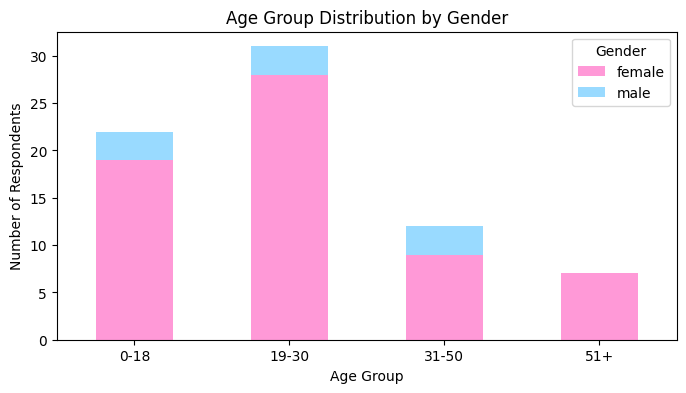

In [29]:
age_data = pd.DataFrame(survey_data_updated["Age"])
age_data['Age'] = pd.to_numeric(age_data['Age'], errors='coerce').dropna()

# Define age bins and labels
bins = [0, 18, 30, 50, 100]
labels = ['0-18', '19-30', '31-50', '51+']

# Group ages into bins
age_data['Age_Group'] = pd.cut(age_data['Age'], bins=bins, labels=labels, right=False)

# Use the actual gender data from survey_data_updated
age_data['Gender'] = survey_data_updated['Gender']
age_data = age_data[age_data['Gender'].isin(['male', 'female'])]

stacked_data = pd.crosstab(age_data['Age_Group'], age_data['Gender'])

stacked_data.plot(kind='bar', stacked=True, figsize=(8, 4), color=['#ff99d7', '#99daff'])
plt.title('Age Group Distribution by Gender')
plt.xlabel('Age Group')
plt.ylabel('Number of Respondents')
plt.legend(title='Gender')
plt.xticks(rotation=0)
plt.show()


*Most popular song*

/tmp/ipykernel_654/1112591249.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=song_counts.index, y=song_counts.values, palette="flare")


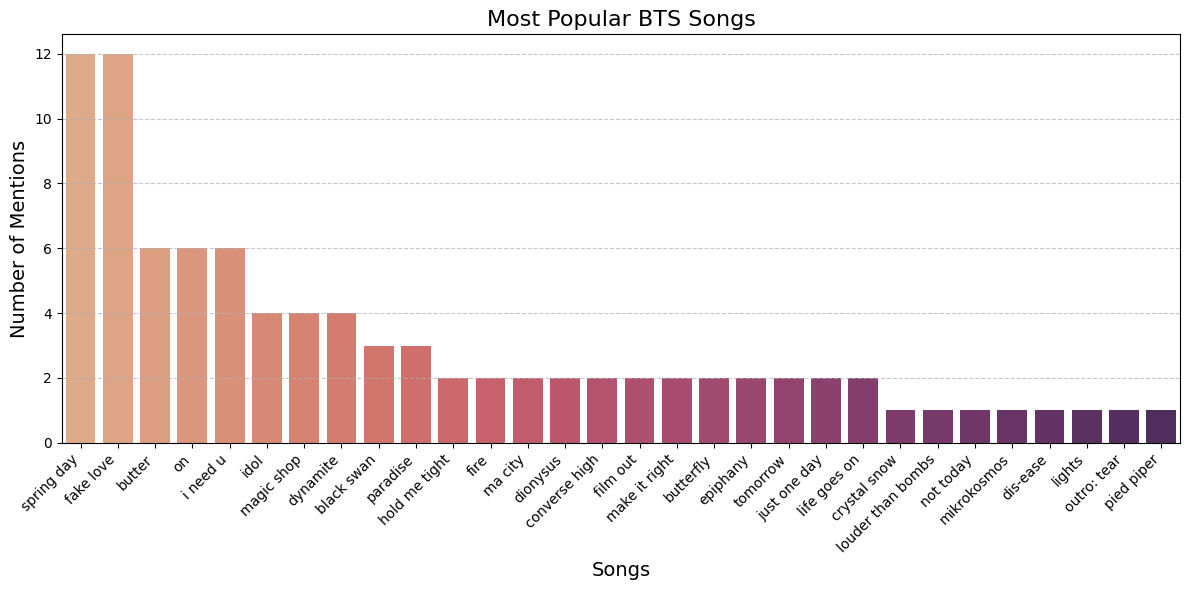

In [30]:
song_counts = merged_data['Favorite_Song'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=song_counts.index, y=song_counts.values, palette="flare")

plt.title("Most Popular BTS Songs", fontsize=16)
plt.xlabel("Songs", fontsize=14)
plt.ylabel("Number of Mentions", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# **Analyzing the spotify**

The code performs clustering on Spotify track data to group tracks into different "mood clusters" based on their audio features. 

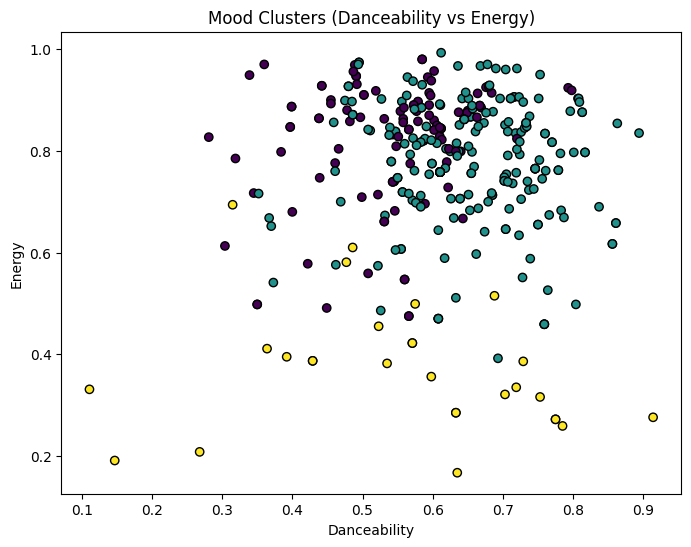

In [31]:
features = [
    'spotify_track_danceability',  
    'spotify_track_energy', 
    'spotify_track_loudness', 
    'spotify_track_valence', 
    'spotify_track_speechiness', 
    'spotify_track_acousticness', 
    'spotify_track_instrumentalness', 
    'spotify_track_liveness', 
    'spotify_track_tempo'
]

df = spotify_data_updated[features].replace('no data', None)
df = df.apply(pd.to_numeric, errors='coerce')
df = df.fillna(df.mean())

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

kmeans = KMeans(n_clusters=3, random_state=42)
df['mood_cluster'] = kmeans.fit_predict(scaled_data)


plt.figure(figsize=(8, 6))
plt.scatter(df['spotify_track_danceability'], df['spotify_track_energy'], c=df['mood_cluster'], cmap='viridis', edgecolor='k')
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.title('Mood Clusters (Danceability vs Energy)')
plt.show()


**Group 1 (danceability and energy)**

Many BTS tracks likely fall into the Green Cluster, showcasing their vibrant and energetic nature, making them suitable for upbeat and lively settings like parties. However, some tracks may belong to the Purple Cluster and Yellow, reflecting a calmer, more ambient vibe.

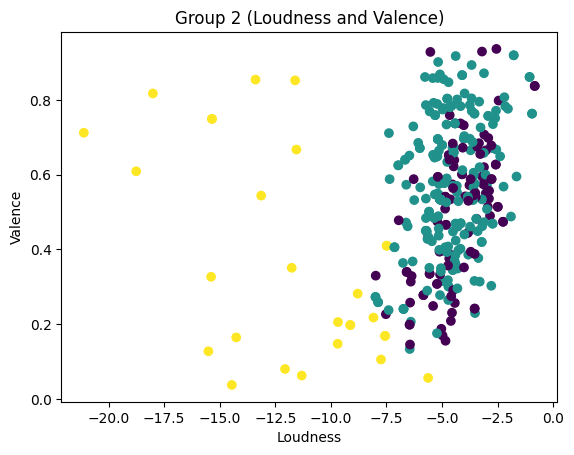

In [32]:
plt.scatter(df['spotify_track_loudness'], df['spotify_track_valence'], c=df['mood_cluster'])
plt.xlabel('Loudness')
plt.ylabel('Valence')
plt.title('Group 2 (Loudness and Valence)')
plt.show()

**Group 2 (Loudness and Valence)**

Tracks likely cluster in the Green and Purple group, indicating loud, high-energy, and upbeat compositions, with some variability in emotional tone. A few quieter or more subdued tracks may fit into the Yellow group, adding diversity to their discography.

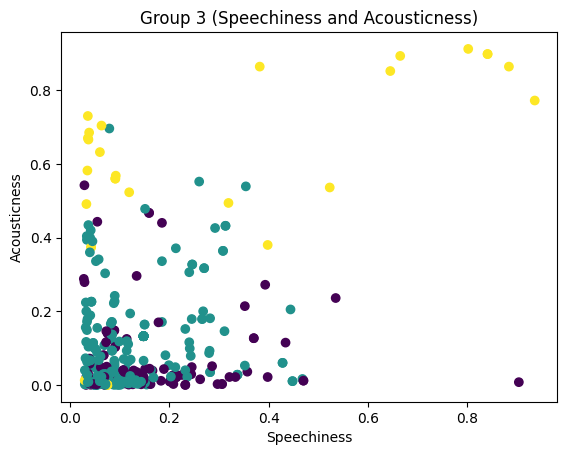

In [33]:
plt.scatter(df['spotify_track_speechiness'], df['spotify_track_acousticness'], c=df['mood_cluster'])
plt.xlabel('Speechiness')
plt.ylabel('Acousticness')
plt.title('Group 3 (Speechiness and Acousticness)')
plt.show()

**Group 3 (Speechiness and Acousticness)**

BTS songs predominantly seem non-speech-focused and synthetic. However, there is also room for natural, acoustic-heavy tracks or rap-influenced songs, showcasing their versatility.

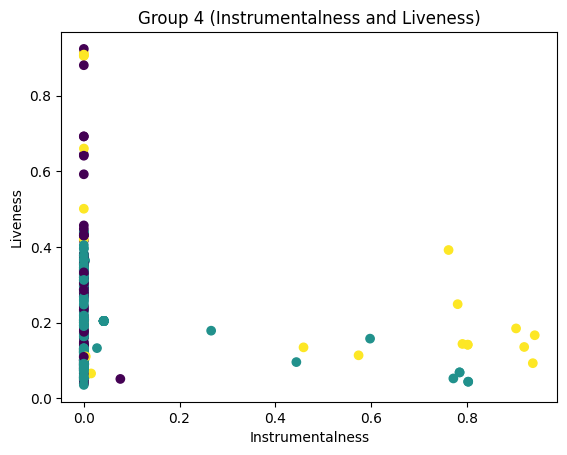

In [34]:
plt.scatter(df['spotify_track_instrumentalness'], df['spotify_track_liveness'], c=df['mood_cluster'])
plt.xlabel('Instrumentalness')
plt.ylabel('Liveness')
plt.title('Group 4 (Instrumentalness and Liveness)')
plt.show()

**Group 4 (Instrumentalness and Liveness)**

Most BTS tracks likely belong to the Green Cluster, emphasizing vocal-heavy compositions that can be adapted for live performances. A smaller proportion may fall into the Purple Cluster, indicating a mix of instrumental and live elements, suitable for concerts or live sessions.

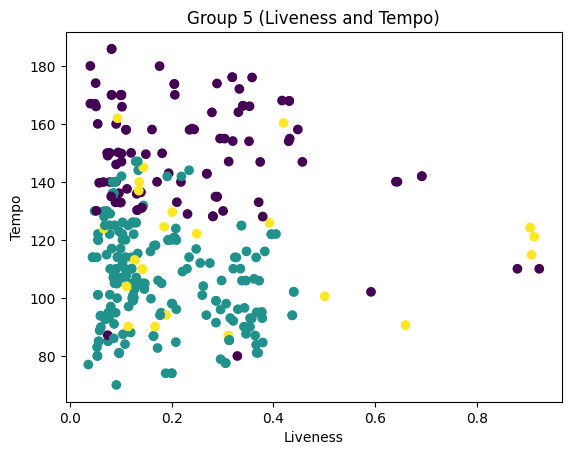

In [35]:
plt.scatter(df['spotify_track_liveness'], df['spotify_track_tempo'], c=df['mood_cluster'])
plt.xlabel('Liveness')
plt.ylabel('Tempo')
plt.title('Group 5 (Liveness and Tempo)')
plt.show()

**Group 5 (Liveness and Tempo)**

Most tracks with low Liveness and varying Tempo fall into the purple cluster, potentially representing fast-paced tracks with less live interaction.The teal cluster includes tracks with medium liveliness and spans a broad range of tempos, possibly representing dynamic or mixed-energy tracks.The sparse yellow cluster might represent tracks with high liveliness, such as live performances or heavily interactive songs.


## Overall Clusters Analysis:

BTS songs demonstrate remarkable diversity across all clusters, with a strong presence in Hreen Clusters for high-energy, upbeat, and rhythmically diverse tracks. Their music also spans calmer, more subdued tones (Purple Clusters) and studio-produced or experimental styles (Yellow Clusters), reflecting a well-rounded and versatile discography.

The overall mood of the BTS songs is **uplifting, high-energy, and engaging**. However, their versatility allows for occasional calmer, quieter, or experimental tracks, creating a balance that caters to diverse listening experiences.

## **BTS songs and their danceability**

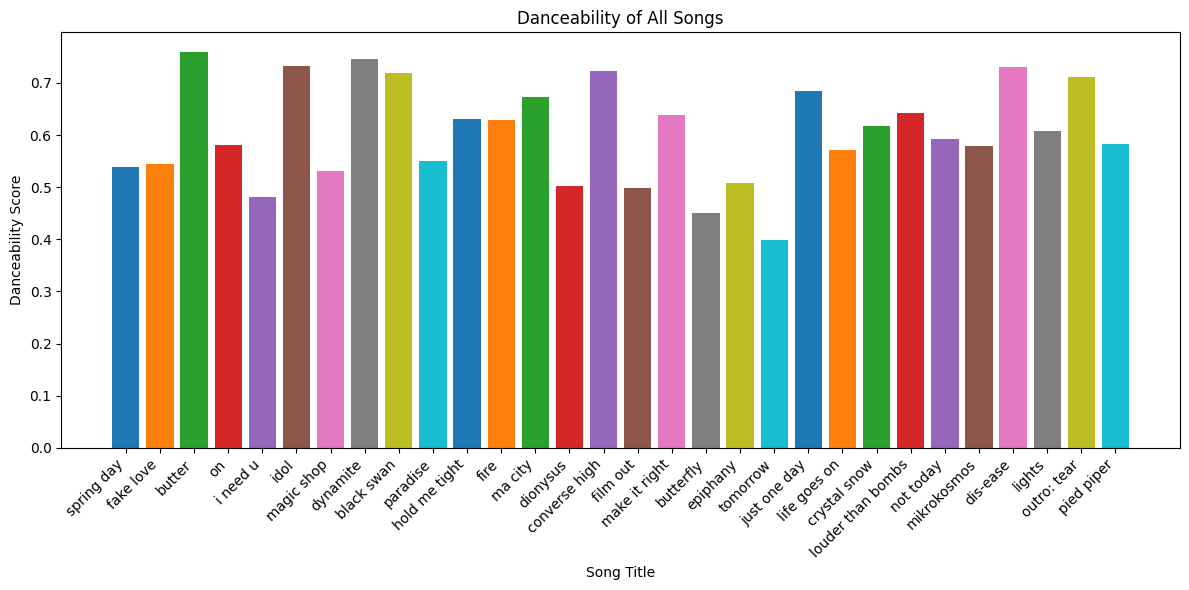

In [52]:
merged_songs_data = pd.merge(
    survey_data_updated, spotify_data_updated, 
    left_on='Favorite_Song', right_on='eng_track_title', 
    how='inner'
)

merged_songs_data['spotify_track_danceability'] = merged_songs_data['spotify_track_danceability'].astype(str)
merged_songs_data['spotify_track_danceability'] = merged_songs_data['spotify_track_danceability'].str.extract(r'(\d+\.\d+)')
merged_songs_data['spotify_track_danceability'] = pd.to_numeric(merged_songs_data['spotify_track_danceability'], errors='coerce')

plt.figure(figsize=(12, 6))
for song in song_counts.index:
    song_data = merged_songs_data[merged_songs_data['Favorite_Song'] == song]
    if not song_data.empty:
        plt.bar(song, song_data['spotify_track_danceability'].mean())

plt.xlabel('Song Title')
plt.ylabel('Danceability Score')
plt.title('Danceability of All Songs')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

- **Spring Day**: Its bar indicats that it has a low danceability score. This aligns with its emotional and nature, as "Spring Day" is more of a sentimental and reflective song.
- **Fake Love**: The song blends intense emotions with a rhythmic beat, which explains its score being neither too high nor too low.
- **Butter**: showing a high danceability score. This is fitting since "Butter" is an upbeat, disco-pop track designed to get people moving, making it highly danceable.

# **Analyzing the lyrics**

This code analyzes survey and Spotify data to find the top 3 favorite songs. It merges the data, identifies the most popular songs, and examines their lyrics for sentiment (positive, negative, or neutral). It creates word clouds for each song's lyrics and checks how these songs impact mood and stress management.

Enhanced Analysis of Top 3 Songs:

Song: Spring Day
Sentiment Polarity: -0.09 (Higher means more positive)
Sentiment Subjectivity: 0.49 (Higher means more personal)
Mood: Negative


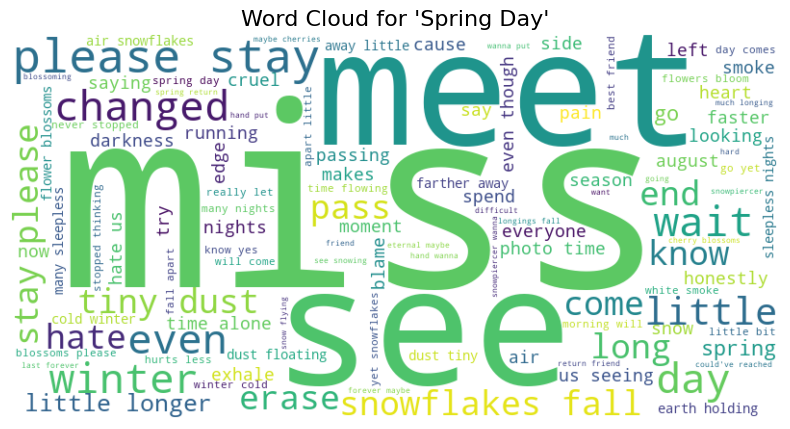


Song: Fake Love
Sentiment Polarity: 0.05 (Higher means more positive)
Sentiment Subjectivity: 0.77 (Higher means more personal)
Mood: Positive


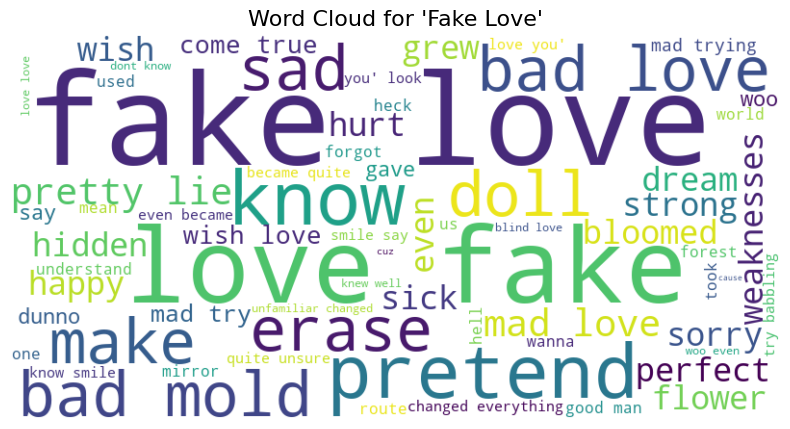


Song: Butter
Sentiment Polarity: 0.14 (Higher means more positive)
Sentiment Subjectivity: 0.47 (Higher means more personal)
Mood: Positive


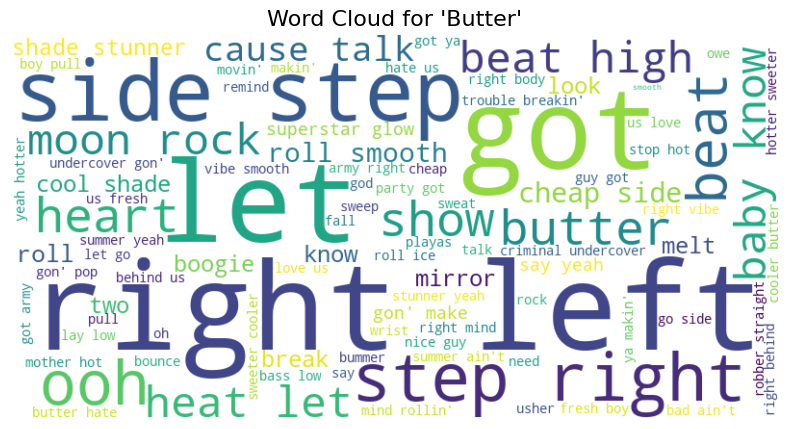


Correlating Sentiment with Mental Health Impact:

Mental Health Impact Correlation Data:
   Favorite_Song BTS_Mood_Impact BTS_Stress_Management
12    spring day               5                   yes
13    spring day               5                   yes
19    spring day               5                   yes
20    spring day               5                   yes
25    spring day               5                   yes
26    spring day               5                   yes
33    spring day               5                   yes
34    spring day               5                   yes
36    spring day               4                   yes
37    spring day               4                   yes
38     fake love               5                   yes
39     fake love               5                   yes
40     fake love               5                   yes
43     fake love               4          i don't know
44     fake love               4          i don't know
45     fake love              

In [51]:
song_counts = merged_songs_data['Favorite_Song'].value_counts()

top_3_songs = song_counts.index[:3].tolist()

top_3_songs_data = merged_songs_data[merged_songs_data['Favorite_Song'].isin(top_3_songs)]

print("Enhanced Analysis of Top 3 Songs:")
for song in top_3_songs:

    song_data = top_3_songs_data[top_3_songs_data['Favorite_Song'] == song]
    
    lyrics = " ".join(song_data['lyrics'].dropna())
    
    analysis = TextBlob(lyrics)
    sentiment_polarity = analysis.sentiment.polarity
    sentiment_subjectivity = analysis.sentiment.subjectivity
    
    mood = "Positive" if sentiment_polarity > 0 else "Negative" if sentiment_polarity < 0 else "Neutral"
    
    print(f"\nSong: {song.title()}")
    print(f"Sentiment Polarity: {sentiment_polarity:.2f} (Higher means more positive)")
    print(f"Sentiment Subjectivity: {sentiment_subjectivity:.2f} (Higher means more personal)")
    print(f"Mood: {mood}")
    
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(lyrics)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for '{song.title()}'", fontsize=16)
    plt.show()

print("\nCorrelating Sentiment with Mental Health Impact:")
correlation_data = top_3_songs_data[['Favorite_Song', 'BTS_Mood_Impact', 'BTS_Stress_Management']]
print("\nMental Health Impact Correlation Data:")
print(correlation_data)


- **Spring Day**

"Spring Day" is a song of longing, separation, and emotional reflection, as expressed by the slightly negative sentiment polarity of -0.09 and a balanced subjectivity of 0.49. The word cloud highlights some important words like "miss," "meet," "winter," and "changed," which symbolize a tough time and hope for restoration. The mood of the song is melancholic yet introspective; thus, it resonates deeply with its audience through its relatable narrative and emotional depth.

- **Fake Love**

The analysis for "Fake Love" shows a nuanced mix of emotions. The sentiment polarity is slightly positive at 0.05, indicating a balance between hope and pain. The high subjectivity score of 0.77 reflects a deeply personal narrative.

The word cloud highlights recurring themes like "fake," "love," "pretend," "hidden," and "weaknesses," pointing to feelings of betrayal, pretense, and vulnerability. Despite its "positive" mood classification, words like "sad," "bad," and "hurt" suggest an undercurrent of emotional struggle, with a focus on the conflict between genuine and artificial affection. This captures the emotional complexity of the song, resonating with listeners who relate to these themes of love and loss.

- **Butter**

The analysis of "Butter" reveals a lighthearted and upbeat tone. The sentiment polarity of 0.14 indicates a positive and cheerful vibe, while the subjectivity score of 0.47 shows a balanced mix of personal expression and descriptive language.

The word cloud highlights playful and dynamic words such as "right," "left," "step," "beat," and "butter," emphasizing rhythm, movement, and smoothness. Themes of fun and confidence are evident with phrases like "cool shade," "rock," "heat," and "boogie," reflecting the song's groovy and vibrant nature.

Overall, "Butter" embodies an energetic and feel-good atmosphere, celebrating charisma and effortless coolness, making it a track full of charm and positivity.

# **Analyze fans' comments from the survey**

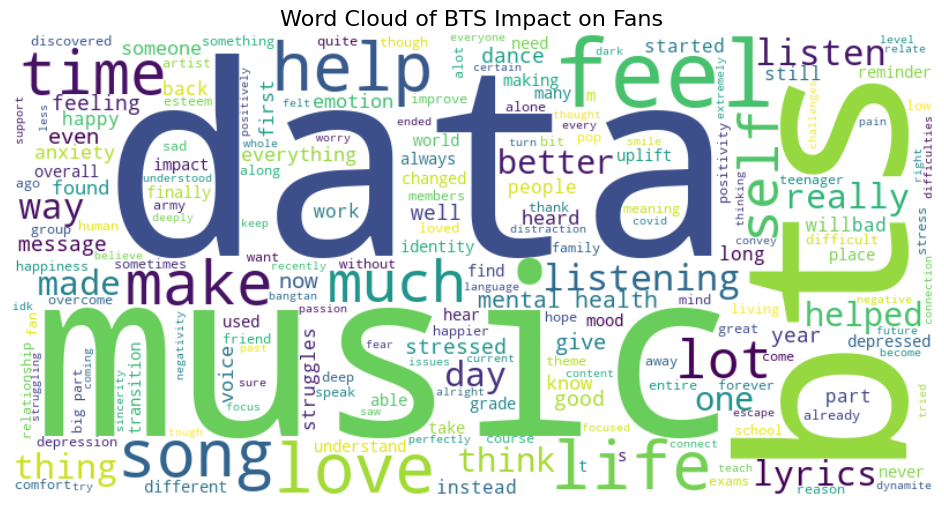

In [37]:
impact_text = " ".join(survey_data_updated['BTS_Impact_Explanation'].dropna()) + " " + \
              " ".join(survey_data_updated['Additional_BTS_Impact'].dropna())

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(impact_text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of BTS Impact on Fans", fontsize=16)
plt.show()


The word cloud illustrates the profound impact BTS songs have on their fans, highlighting themes of emotional support, personal growth, and mental health. Prominent words such as "feel," "love," "help," "music," and "self" suggest that fans find solace and inspiration in BTS's music. Words like "mental health," "anxiety," "better," and "struggles" reflect how their songs help fans cope with challenges and foster positivity.

The inclusion of terms like "lyrics," "message," and "voice" emphasizes the meaningful connection fans have with BTS's artistry and their ability to convey relatable experiences. Fans also mention the transformative nature of the music, using words like "uplift," "overcome," and "change." This highlights the role of BTS in promoting healing, happiness, and empowerment.

### **ARMY Fandom**

This code analyzes the sentiment of the ARMY fandom's mental health impact based on the ARMY_Fandom_MH_Impact column. It assigns a sentiment label ("Positive," "Negative," or "Neutral") to each entry based on keywords in the text. Missing or "no data" entries are labeled as "Neutral."

It then calculates the counts of each sentiment and visualizes their distribution with a pie chart. The chart shows the percentage of Neutral, Positive, and Negative sentiments, with a clean layout and a descriptive title.

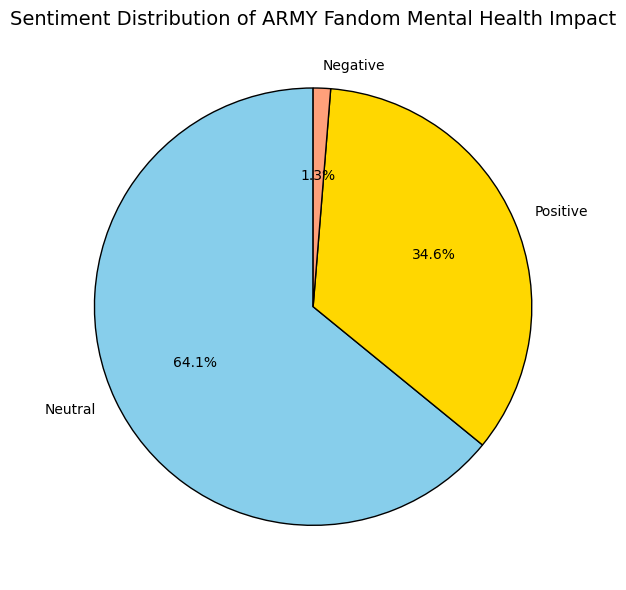

In [38]:
survey_data_updated['Sentiment'] = survey_data_updated['ARMY_Fandom_MH_Impact'].apply(
    lambda text: (
        "Neutral" if pd.isna(text) or text.lower() == "no data" else
        ("Positive" if any(word in text.lower() for word in ["happy", "positive", "better", "uplift", "support", "good"]) else
         ("Negative" if any(word in text.lower() for word in ["worse", "negative", "bad", "sad", "anxious", "struggle"]) else
          "Neutral"))
    )
)

sentiment_counts = survey_data_updated['Sentiment'].value_counts()

plt.figure(figsize=(8, 6))
colors = ['#87CEEB', '#FFD700', '#FFA07A']
sentiment_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=colors, labels=['Neutral', 'Positive', 'Negative'], wedgeprops={'edgecolor': 'black'})
plt.title('Sentiment Distribution of ARMY Fandom Mental Health Impact', fontsize=14)
plt.ylabel('')
plt.tight_layout()
plt.show()


### **Impact on fans from different countries**

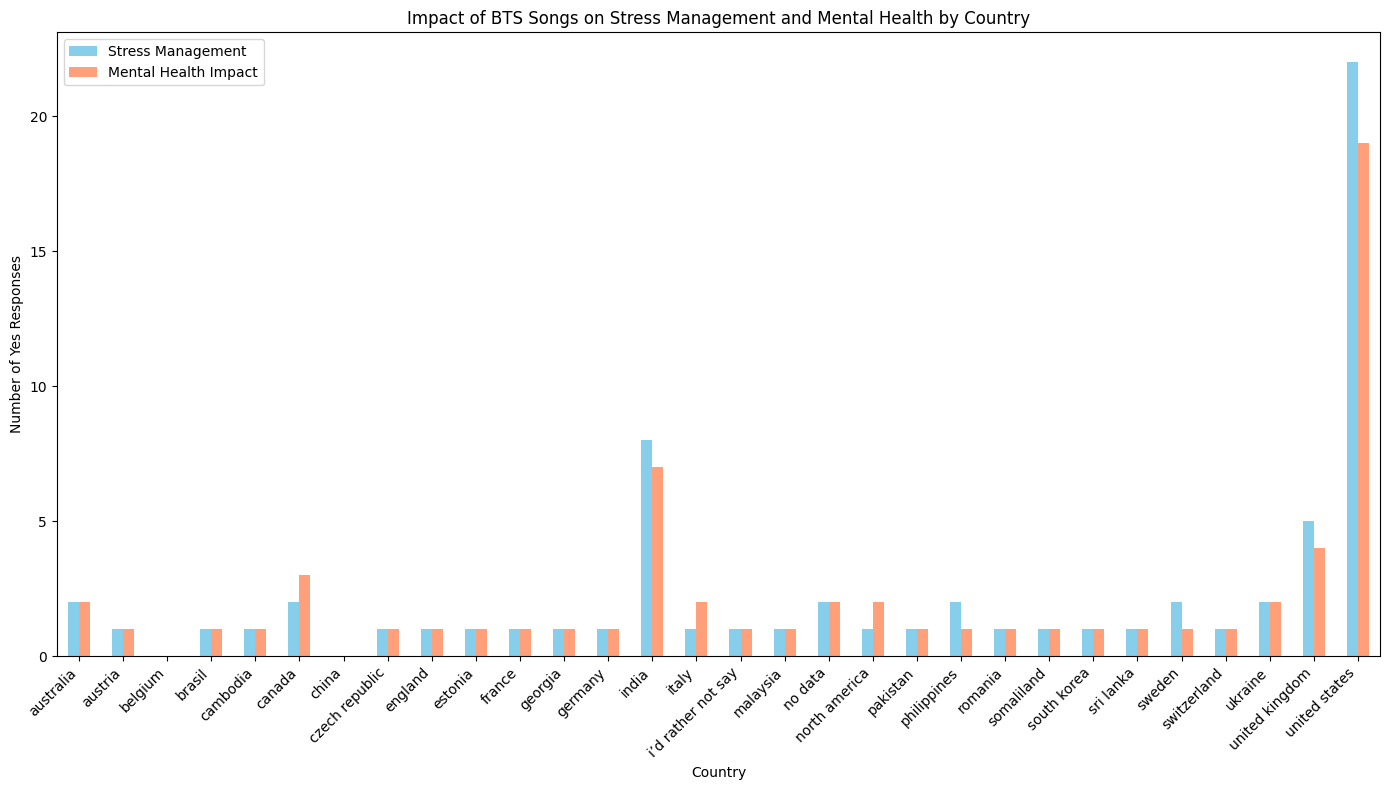

In [39]:
country_impact_data = survey_data_updated.groupby('Country')[['BTS_Stress_Management', 'BTS_Mental_Health_Impact']].apply(
    lambda x: (x == 'yes').sum()
)

# Plot a bar chart
country_impact_data.plot(kind='bar', figsize=(14, 8), color=['#87CEEB', '#FFA07A'])
plt.title("Impact of BTS Songs on Stress Management and Mental Health by Country")
plt.xlabel("Country")
plt.ylabel("Number of Yes Responses")
plt.xticks(rotation=45, ha='right')
plt.legend(["Stress Management", "Mental Health Impact"])
plt.tight_layout()
plt.show()

**Result**

The chart highlights BTS's global impact, with the **United States** and **India** showing the highest responses for both stress relief and mental health improvement. Stress management generally surpasses mental health impact across most countries, indicating BTS's music primarily helps fans reduce stress. Their influence spans diverse regions, reflecting their widespread reach and emotional support for fans worldwide.

# **Analysis Result**

# ***References***

1. Color pallete: https://seaborn.pydata.org/tutorial/color_palettes.html
2. Clustering: https://mtukerry.instructure.com/courses/4547/files/647490?module_item_id=206811
3. Clustering GitHub: https://github.com/Shubhangi-6/Spotify-Data-Analysis-Using-Kmeans-Machine-Learning
4. SSentiment Analysis Project Using TextBlob: https://medium.com/@qudrohbidemi/sentiment-analysis-project-using-textblob-216d3fe119fc
5. Generating WordClouds in Python Tutorial: https://www.datacamp.com/tutorial/wordcloud-python
6. Sentiment Analysis with TextBlob: https://www.analyticsvidhya.com/blog/2021/10/sentiment-analysis-with-textblob-and-vader/
7. WordClouds with Python: https://medium.com/@m3redithw/wordclouds-with-python-c287887acc8b
8. Generating Word Cloud in Python: https://www.geeksforgeeks.org/generating-word-cloud-python/
9. Applying Lambda functions to Pandas Dataframe: https://www.geeksforgeeks.org/applying-lambda-functions-to-pandas-dataframe/
10. Matplotlib Pie Chart - Tutorial and Examples: https://stackabuse.com/matplotlib-pie-chart-tutorial-and-examples/
11. Labeling a pie and a donut: https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_and_donut_labels.html
12. Pandas: How to Use Groupby and Count with Condition: https://www.statology.org/pandas-groupby-count-with-condition/
13. Bar color demo: https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_colors.html
14. Create a grouped bar plot in Matplotlib: https://www.geeksforgeeks.org/create-a-grouped-bar-plot-in-matplotlib/